In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [41]:
df=pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
df.shape

(768, 9)

In [44]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [45]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
#Checking for duplicate values in the dataset
num_duplicates=df.duplicated().sum()
if num_duplicates>0:
    print(f"The dataset contains{num_duplicates}duplicate values")
else:
    print("The dataset has no duplicate values.")


The dataset has no duplicate values.


In [47]:
df=df.drop_duplicates()
print("Number of duplicate values after dropping is;",num_duplicates)

Number of duplicate values after dropping is; 0


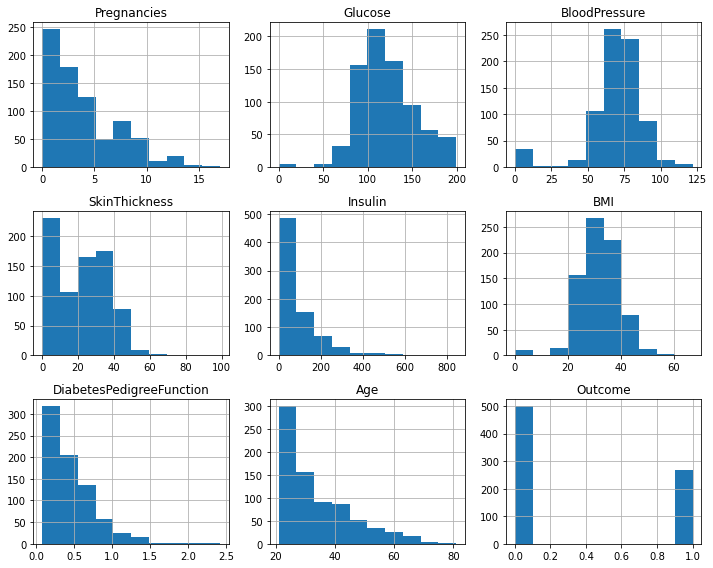

In [48]:
#checking for data distribution
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [52]:
X=df.iloc[:,:-1]
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [53]:
y=df.iloc[:,-1]
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [54]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=51)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [56]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_predict=logistic.predict(X_test)
print("Y_predict:\n",y_predict)

Y_predict:
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 0 0]


In [60]:
print("Y_test:\n",y_test)

Y_test:
 737    0
505    0
296    1
711    0
329    0
      ..
405    0
315    0
131    1
364    0
322    1
Name: Outcome, Length: 231, dtype: int64


In [62]:
score=accuracy_score(y_test,y_predict)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 <function confusion_matrix at 0x00000278BC07BD30>


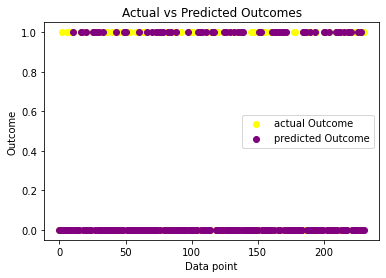

In [78]:
#create a figure and axis
fig,ax=plt.subplots()
#plot the actual outcome
ax.scatter(range(len(y_test)),y_test,color='yellow',label='actual Outcome')
ax.scatter(range(len(y_predict)),y_predict,color='purple',label='predicted Outcome')
#set axis label and title
ax.set_xlabel('Data point')
ax.set_ylabel('Outcome')
ax.set_title('Actual vs Predicted Outcomes')
#add a legend
ax.legend()
#show the plot
plt.show()

Text(0, 0.5, 'Y')

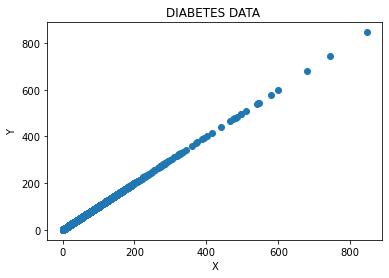

In [81]:
plt.scatter(X,Y)
plt.title("DIABETES DATA ")
plt.xlabel("X")
plt.ylabel("Y")